In [5]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
#import torch.nn.functional as F

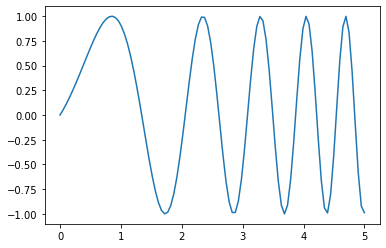

In [265]:
def f(x):
    return np.sin(x + x**2)

xx = np.linspace(0,5,100)
yy = f(xx)
plt.plot(xx, yy )

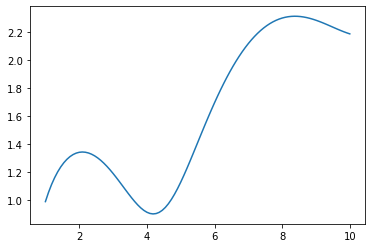

In [266]:
def g(x):
    return np.log(x + 2 * np.sin(x))

xx = np.linspace(1,10,100)
yy = g(xx)
plt.plot(xx, yy )

Задание🐾 Написать нейросеть, которая бы обучалась указанным ниже функциям. Известна функция и отрезок. Нужно создать датасет (набор x, набор y) и на них обучить нейросеть.  
На входе и на выходе один нейрон.  
Подсказка☕  Использовать гладкую функцию активации.

In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [289]:
# Для воспроизводимости зафиксируем случайную конастанту
torch.manual_seed(1) 

def generate_data(flg = 'f'):
    # Генерация 100 элементов данных равномерно от 0 до 5 по оси х
    
    if flg == 'f':
        tensor_x = torch.linspace(0,5,100)
        # Изменение размерности 100 массивов
        x = torch.unsqueeze(tensor_x, dim=1)
        # Генерация данных по оси y, функция плюс некоторый шум
        y = f(x) + 0.2*torch.rand(x.size())
    elif flg == 'g':
        tensor_x = torch.linspace(1,10,80)
        x = torch.unsqueeze(tensor_x, dim=1)
        y = g(x) + 0.2*torch.rand(x.size())
    
    return x, y

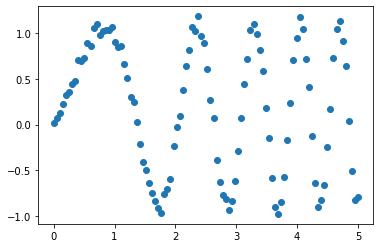

In [267]:
# Вот так выглядят наши сгенерированные данные.
x, y = generate_data('f')

xx = Variable(x)
yy = Variable(y)

plt.scatter(xx.data.numpy(), yy.data.numpy())
plt.show()

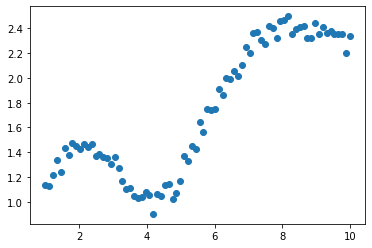

In [290]:
# Вот так выглядят наши сгенерированные данные.
x, y = generate_data('g')

xx = Variable(x)
yy = Variable(y)

plt.scatter(xx.data.numpy(), yy.data.numpy())
plt.show()

In [241]:
# Теперь напишем нейронную сеть
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(NeuralNet, self).__init__()
        #  слой нейронной сети.
        self.fc1 = nn.Linear(input_size, hidden_size1) 
        # Функция активации
        self.sig = nn.Sigmoid()
        self.tan = nn.Tanh()
        # слой нейронной сети
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)  
        # слой нейронной сети
        self.fc3 = nn.Linear(hidden_size2, num_classes)   
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.tan(out)
        out = self.fc2(out)
        out = self.sig(out)
        out = self.fc3(out)
        ##out = self.sig(out)
        
        return out

In [252]:
# Четыре слоя
model = NeuralNet(1, 15, 10, 1)

In [275]:
def Learning(label, model, x, y, lr = 0.01, betas = (0.9, 0.999),total_step = 15000):
    x, y = generate_data(label)
  # Лосс функция MSE, так как у нас регрессия
    criterion = torch.nn.MSELoss()
  # Оптимизатор
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, betas = betas)

  # Обучение
    for i in range(total_step):
        # Прогнозируем значение при помощи нашей нейросети
        outputs = model(x)
        
        # Считаем функцию потерь
        loss = criterion(outputs, y)

        # Обнуляем градиент
        optimizer.zero_grad()
        loss.backward()
        # Делаем шаг
        optimizer.step()

        if i % 1000 == 0:
            print ('Step [{}/{}], Loss: {:.4f}'.format(i, total_step, loss.item()))
            
    plt.scatter(x.data.numpy(), y.data.numpy())
    # r- красный lw - ширина линии
    plt.plot(x.data.numpy(), outputs.data.numpy(), 'g-', lw=2)
    plt.text(0.5, 0, 'Loss=%.4f'%loss.data.numpy(), fontdict={'size':20, 'color': 'purple'})
    
    return outputs

Step [0/15000], Loss: 0.0069
Step [1000/15000], Loss: 0.0029
Step [2000/15000], Loss: 0.0046
Step [3000/15000], Loss: 0.0025
Step [4000/15000], Loss: 0.0025
Step [5000/15000], Loss: 0.0026
Step [6000/15000], Loss: 0.0025
Step [7000/15000], Loss: 0.0024
Step [8000/15000], Loss: 0.0024
Step [9000/15000], Loss: 0.0039
Step [10000/15000], Loss: 0.0024
Step [11000/15000], Loss: 0.0024
Step [12000/15000], Loss: 0.0024
Step [13000/15000], Loss: 0.0025
Step [14000/15000], Loss: 0.0023


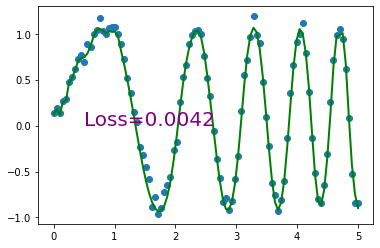

In [276]:
pred_f = Learning('f', model, x, y, lr = 0.01, betas = (0.8, 0.999), total_step = 15000)

Step [0/2000], Loss: 0.0038
Step [1000/2000], Loss: 0.0026


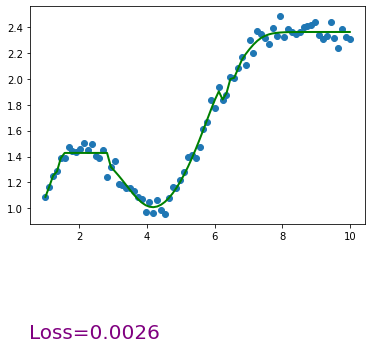

In [306]:
# Почему переобучается ?
pred_g = Learning('g', model, x, y, lr = 0.01, betas = (0.9, 0.999), total_step = 2000)